# Task 3
# Author Aayushma Pant
# Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv('SampleSuperstore.csv')


In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
data["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data["Postal Code"]=data["Postal Code"].astype("object")

In [8]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# cleaning the data

In [10]:
data["Revenue"]=data["Sales"]-data["Profit"]
data["Gross Price"]=(data["Revenue"]-data["Profit"])/data["Quantity"]
data["Net Price"]=data["Gross Price"]-(data["Gross Price"]*data["Discount"])
data=data.drop("Gross Price",axis=1)

In [11]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Revenue,Net Price
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,89.066400
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,97.592000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,0.438600
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,189.600345
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,6.934080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,21.1452,4.544640
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,76.3268,30.346800
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932,239.1828,87.915840
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,16.2800,0.740000


In [12]:
data["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [13]:
data.pivot_table(
    values=["Sales", "Quantity", "Net Price","Profit"],
                        columns=["Segment", "Category"],
                        aggfunc=[np.mean], 
                        fill_value=0, margins=True)


mean
          Segment     Category                   
Net Price Consumer    Furniture         67.091544
                      Office Supplies   14.987583
                      Technology        56.176808
          Corporate   Furniture         66.035926
                      Office Supplies   16.264748
                      Technology        57.997346
          Home Office Furniture         63.614002
                      Office Supplies   13.367894
                      Technology        62.284119
          All                           33.831117
Profit    Consumer    Furniture          6.281293
                      Office Supplies   18.014174
                      Technology        74.445646
          Corporate   Furniture         11.741201
                      Office Supplies   22.102923
                      Technology        79.723823
          Home Office Furniture         10.705465
                      Office Supplies   24.034439
                      Technology        89.152458
          All                           28.656896
Quantity  Consumer    Furniture          3.743037
                      Office Supplies    3.760154
                      Technology         3.782334
          Corporate   Furniture          3.862229
                      Office Supplies    3.856044
                      Technology         3.781588
          Home Office Furniture          3.776243
                      Office Supplies    3.827618
                      Technology         3.646199
          All                            3.789574
Sales     Consumer    Furniture        351.347091
                      Office Supplies  116.390194
                      Technology       427.339534
          Corporate   Furniture        354.519792
                      Office Supplies  126.745309
                      Technology       444.855810
          Home Office Furniture        336.825131
                      Office Supplies  115.309021
                      Technology       535.976658
          All                          229.858001

In [14]:
data.pivot_table(index=["Ship Mode"],
    values=["Sales", "Quantity", "Net Price","Profit"],
                        columns=["Segment", "Category"],
                        aggfunc=[np.mean], 
                        fill_value=0, margins=True)


mean                                        \
                Net Price                                         
Segment          Consumer                             Corporate   
Category        Furniture Office Supplies Technology  Furniture   
Ship Mode                                                         
First Class     62.450641       13.548278  54.784615  66.465016   
Same Day        64.366069       10.623072  50.088926  75.474364   
Second Class    68.998771       15.449067  52.308601  67.618828   
Standard Class  67.850252       15.638462  58.416026  64.762560   
All             67.091544       14.987583  56.176808  66.035926   

                                                                        \
                                                                         
Segment                                    Home Office                   
Category       Office Supplies  Technology   Furniture Office Supplies   
Ship Mode                                                                
First Class          14.443731   71.301564   80.520999       14.718760   
Same Day             19.648435  224.445833   61.485329       10.553464   
Second Class         25.213832   49.476327   68.012407       14.175689   
Standard Class       13.477416   48.817389   57.593886       13.096713   
All                  16.264748   57.997346   63.614002       13.367894   

                                      ...                              \
                                      ...       Sales                   
Segment                          All  ...    Consumer                   
Category       Technology             ...   Furniture Office Supplies   
Ship Mode                             ...                               
First Class     65.269227  34.663228  ...  304.140366      105.702875   
Same Day        57.544661  36.877084  ...  299.321379       80.705969   
Second Class    57.410651  35.783718  ...  367.793295      119.000212   
Standard Class  63.668163  32.703175  ...  362.621118      121.823064   
All             62.284119  33.831117  ...  351.347091      116.390194   

                                                                     \
                                                                      
Segment                      Corporate                                
Category        Technology   Furniture Office Supplies   Technology   
Ship Mode                                                             
First Class     409.996201  337.284537      108.519639   435.574033   
Same Day        435.601655  468.189321      111.253609  1431.501353   
Second Class    402.997812  342.176155      168.844522   361.315190   
Standard Class  438.904020  354.782641      118.208259   425.982994   
All             427.339534  354.519792      126.745309   444.855810   

                                                                    
                                                                    
Segment        Home Office                                     All  
Category         Furniture Office Supplies  Technology              
Ship Mode                                                           
First Class     436.845949      132.224436  630.233774  228.497024  
Same Day        251.370680       91.214531  457.541130  236.396179  
Second Class    401.235600      147.546401  396.614145  236.089239  
Standard Class  297.048209      105.055419  565.636707  227.583067  
All             336.825131      115.309021  535.976658  229.858001  

[5 rows x 40 columns]

In [35]:
# Data visualization


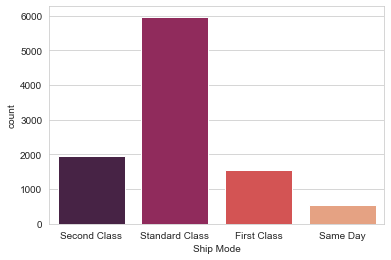

In [15]:
sns.set_style("whitegrid")
sns.countplot("Ship Mode",data=data,palette='rocket')

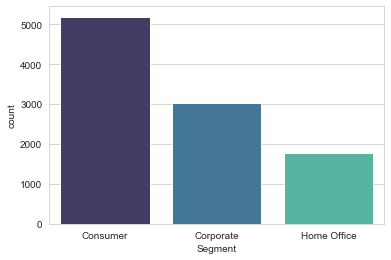

In [16]:
sns.set_style("whitegrid")
sns.countplot("Segment",data=data,palette='mako')

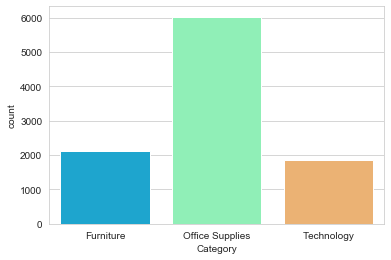

In [49]:
sns.set_style("whitegrid")
sns.countplot("Category",data=data, palette='rainbow')

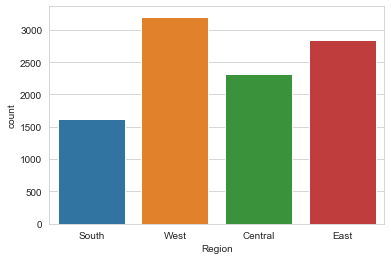

In [17]:
sns.set_style("whitegrid")
sns.countplot("Region",data=data)

In [20]:
d1=data.groupby("Region")["Net Price"].sum()
d1

Region
Central     75618.803676
East        97767.158740
South       54454.435715
West       110267.782530
Name: Net Price, dtype: float64

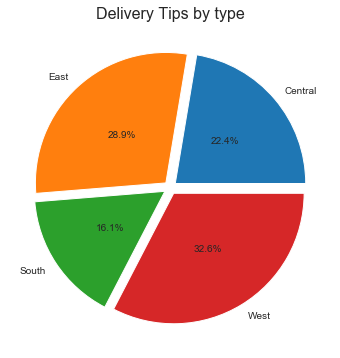

In [22]:
pie, ax = plt.subplots(figsize=[10,6])
labels = d1.keys()
plt.pie(x=d1, autopct="%.1f%%", explode=[0.05]*4,labels=labels, pctdistance=0.5)
plt.title("Delivery Tips by type", fontsize=16);


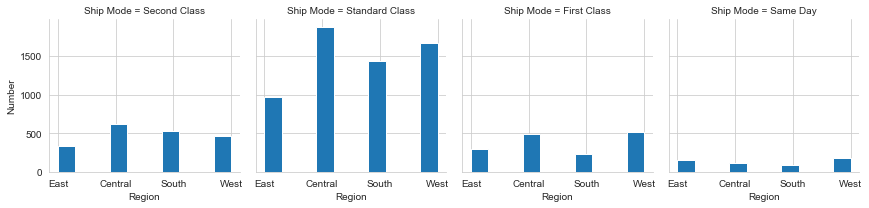

In [24]:
# Visualizing the region from ship mode
region= sns.FacetGrid(data, col='Ship Mode',palette='rocket')
region.map(plt.hist, 'Region')
region.set_ylabels('Number')

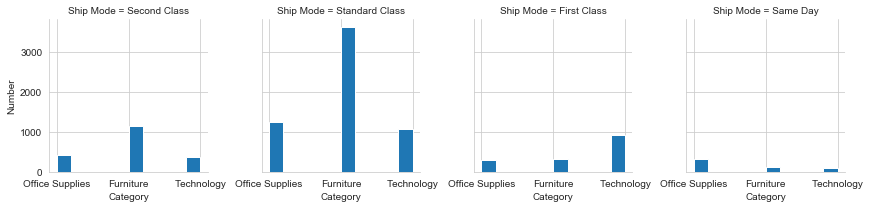

In [78]:
# visualizing the category according to ship Mode
category = sns.FacetGrid(data, col='Ship Mode')
category.map(plt.hist, 'Category')
category.set_ylabels('Number')

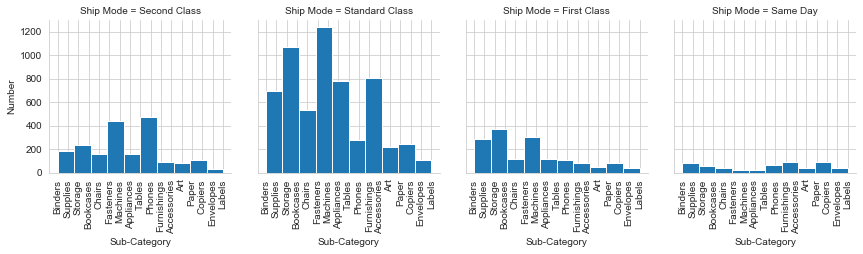

In [29]:
# visualizing the category according to ship Mode
category = sns.FacetGrid(data, col='Ship Mode')
category.map(plt.hist, 'Sub-Category')
category.set_ylabels('Number')
category.set_xticklabels(rotation=90)

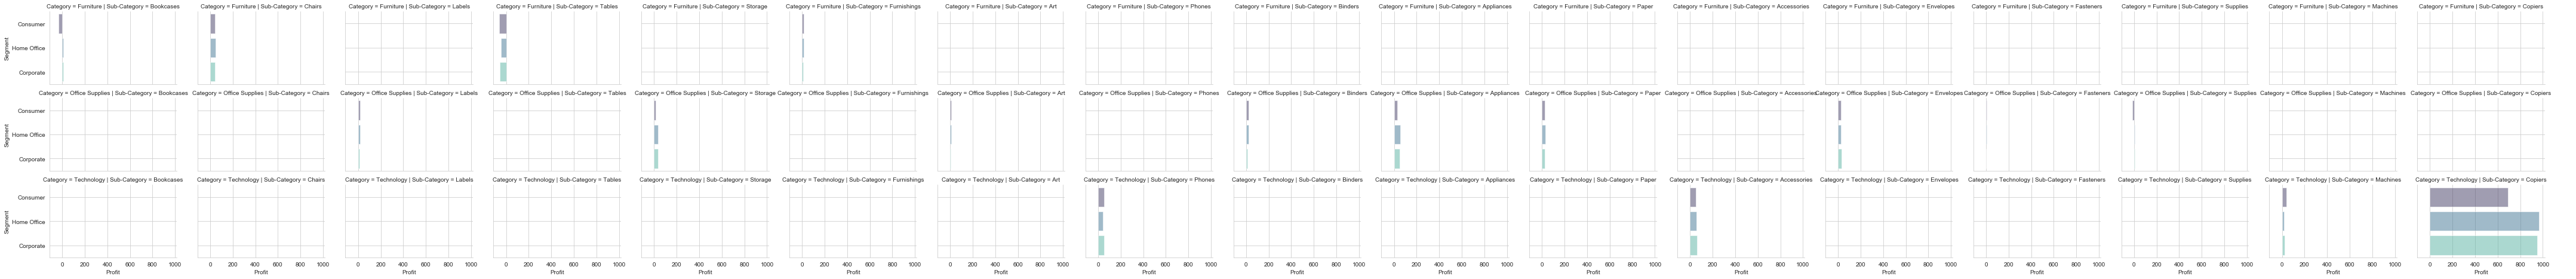

In [30]:
# Visualizing netprice and segment from cateory and sub category
grid = sns.FacetGrid(data, row='Category', col='Sub-Category', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Profit', 'Segment', alpha=.5, ci=None,palette='mako')
grid.add_legend()

In [95]:
# Maximum profit is earned by copiers so increment of its quantity can be benificial for the business.
# Furniture items like bookcase, tables, furshing are making losses so these can be shifted from standard class ship mode to first class pr same day ship mode.
# Sells using standard mode can be shifed to first class for office use to increase more number of profit.